# ADG with a real variable and Chebyshev's inequality
**author:Alessio Benavoli**
<a href="http://www.alessiobenavoli.com"> alessiobenavoli.com </a>

We will learn how to build a PyRational **ADG (Almost Desirable Gambles)** belief model on the outcome of an experiment whose space of possibility is the real-line. 

In [2]:
%load_ext autoreload
%autoreload 2
from __future__ import absolute_import 
from PyRational.models.ADG import  ADG
from sympy import symbols,  Interval, Piecewise, Eq, exp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*PyRational* uses *Sympy* for symbolic mathematics. We need to define in *Sympy*  a `symbol` associated to the real variable and its relative domain  (we use Sympy `Interval` for the latter).

In [3]:
x=symbols('x', real=True)
domain_x=Interval(-50,50)

In [4]:
model = ADG([x],[domain_x])
model

List of Symbols
Domain
List of desirable gambles
Avoiding sure loss?


We assume that our agent, Alice, finds the following gambles desirable.

In [5]:
G=[]
G.append( x) 
G.append(-x) 
G.append(x**2-1)
G.append(1-x**2)    

We add all these gambles to `model` as follows:

In [6]:
model.add_gambleList(G)
model

List of Symbols
Domain
List of desirable gambles
Avoiding sure loss?


In [7]:
model.Gambles

[x, -x, x**2 - 1, -x**2 + 1]

Note that $G$ is a list that includes all Alice's desirable gambles. We now `build` the belief model
and check if it avods sure loss:

In [8]:
optimoptions={'method_LISP': 'Cutting_plane', #'Cutting_plane', 'discretise'
                       'SolverLP':'cplex', #'linprog', 'cplex'
                       'LP_acc_constraints':1e-30,
                       'SolverNLP':'differential_evolution',
                       'NLP_alpha_cut':-0.0001,
                       'num_support_points': 60,
                       'verbose':False}
model.buildModel(options=optimoptions)
model.check_avs(options=optimoptions)
model

Belief Model avoids sure  loss


List of Symbols
Domain
List of desirable gambles
Avoiding sure loss?


So Alice is **rational** or, equivalently, her set of desirable gambles is coherent.

## Inference

Assume Alice is interested in computing her maximum buying price for the gamble

$$
f=\left\{\begin{array}{ll}
1 & \text{if } |x|\leq k\\
0 & \text{if } |x|>k\\
\end{array}\right.
$$

for some $k>0$. We can do that as follows:

In [9]:
LP=[]
f_range=(None,None)
kappas=np.linspace(1,20,100)
for k in kappas:
    f=Piecewise((1,abs(x)<=k),(0.0,True))    
    lp=model.lower_prevision(f,f_range,options=optimoptions)
    LP.append(lp)
LP=np.array(LP)

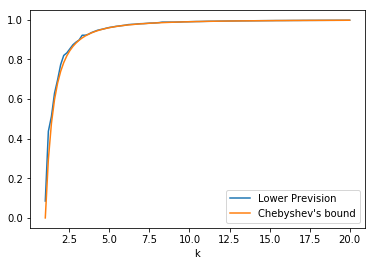

In [12]:
plt.plot(kappas,LP,label='Lower Prevision')
plt.plot(kappas,1-1/kappas**2,label="Chebyshev\'s bound")
plt.xlabel('k')
plt.legend()

Hence, the lower prevision of $f$ coincides with Chebyshev's inequality for a standardised variable (zero mean and variance one).

$$
P(|X|\leq k)\leq 1-\frac{1}{k^2}
$$



## Updating

In ADG we can define updating by either defining an indicator on an event or defining a weighting function.
This latter case is formally similar to Bayes'rule with proability density functions.
Let us consider for instance the following unnormalised Gaussian density


In [30]:
h = exp(-(x-1)**2/0.5)

In [32]:
LP=[]
f_range=(None,None)
kappas=np.linspace(1,20,100)
for k in kappas:
    f=Piecewise((1,abs(x)<=k),(0.0,True))    
    lp=model.lower_prevision(f,f_range,h=h,options=optimoptions)
    LP.append(lp)
LP=np.array(LP)

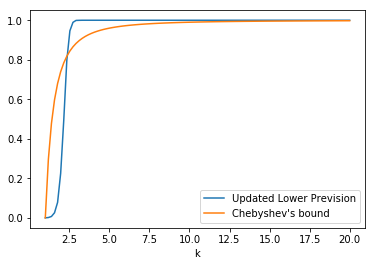

In [33]:
plt.plot(kappas,LP,label='Updated Lower Prevision')
plt.plot(kappas,1-1/kappas**2,label="Chebyshev\'s bound")
plt.xlabel('k')
plt.legend()

In [35]:
newG = model.updating(options=optimoptions,h=h)

In [36]:
newG

[x + 0.330235550086851,
 -x + 1.60332664739529,
 x**2 - 0.000184451910457351,
 -x**2 + 3.12413355052226]